## 逻辑回归中使用正则化（Regularization）
<font size=5>
限制参数的大小
$$J(\theta) +\alpha L_2$$
$$J(\theta) +\alpha L_1$$

$$C\cdot{J(\theta) +L_2}$$
$$C\cdot{J(\theta) +L_1}$$
sklearn中使用的正则化方式

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
X = np.random.normal(0,1,size=(200,2))
y = np.array(X[:,0]**2 + X[:,1] < 1.5, dtype='int')

for _ in range(20):
    y[np.random.randint(200)]=1
    
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

In [2]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=666)

## 使用sklearn中的逻辑回归


In [3]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

/root/jupyter/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [4]:
log_reg.score(X_test,y_test)

0.86

In [5]:
log_reg.score(X_train,y_train)

0.7933333333333333

In [6]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(),x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, alpha=0.75, cmap=custom_cmap)

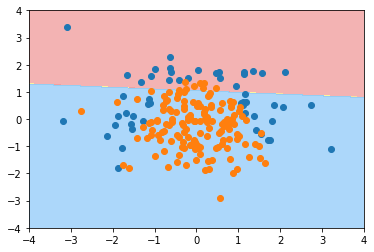

In [7]:
plot_decision_boundary(log_reg,[-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


def PolynomialRegression(degree):
    return Pipeline([
        ("poly",PolynomialFeatures(degree=degree)),
        ("std_scaler",StandardScaler()),
        ("log_reg",LogisticRegression())
    ])


/root/jupyter/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


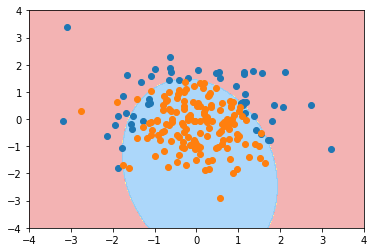

In [9]:
poly_reg = PolynomialRegression(2)
poly_reg.fit(X_train,y_train)
plot_decision_boundary(poly_reg,[-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

In [10]:
def PolynomialRegression(degree, C):
    return Pipeline([
        ("poly",PolynomialFeatures(degree=degree)),
        ("std_scaler",StandardScaler()),
        ("log_reg",LogisticRegression(C=C))
    ])

In [19]:
poly_reg2 = PolynomialRegression(10, 0.1)
poly_reg2.fit(X_train,y_train)
poly_reg2.score(X_test,y_test)

/root/jupyter/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.94

In [20]:
poly_reg2.score(X_train,y_train)

0.8733333333333333

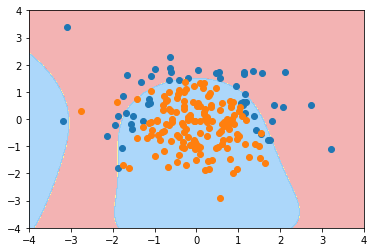

In [24]:
plot_decision_boundary(poly_reg2,axis=[-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

In [22]:
def PolynomialRegression(degree, C, penalty='l2'):
    return Pipeline([
        ("poly",PolynomialFeatures(degree=degree)),
        ("std_scaler",StandardScaler()),
        ("log_reg",LogisticRegression(C=C,penalty=penalty))
    ])

In [16]:
poly_reg_l1 = PolynomialRegression(10,C=0.1,penalty='l1')
poly_reg_l1.fit(X_train,y_train)
poly_reg_l1.score(X_train,y_train)

/root/jupyter/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8266666666666667

In [17]:
poly_reg_l1.score(X_test,y_test)

0.9

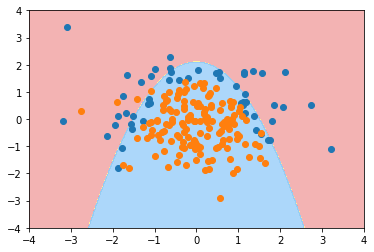

In [25]:
plot_decision_boundary(poly_reg_l1,[-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])